In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

!mv -f /kaggle/input/heart-disease-dataset/heart.csv /content/

Path to dataset files: /kaggle/input/heart-disease-dataset
mv: cannot remove '/kaggle/input/heart-disease-dataset/heart.csv': Read-only file system


In [16]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/heart.csv')
print(df.head(n=2))
print(df.shape)

print("*" * 50,"\n")
#check for column names, their dtype and non null count
print(df.info())
print("*" * 50,"\n")

#check for statistical values like mean, std , mediam etc for each column(integer values)
print(df.describe())
print("*" * 50,"\n")

#check for missing values
print(df.isnull().sum())
print("*" * 50,"\n")

#check for class imbalance
print(df["target"].value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
(1025, 14)
************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca     

# Insight -

- There are **no null values** in the dataset.
- The **target variable is well balanced**, making it suitable for classification.
- All feature columns contain **integer values**.
- Tree-based models are a great choice here because:
  - They can handle integer (and categorical) variables **without requiring normalization or scaling**.
  - They naturally manage different types and distributions in the features.

Given these points, the dataset is well-prepared for building tree-based models.  
Next, we can proceed with preparing the data for training by splitting it into training and testing sets.


In [18]:
#prepare data for the model

from sklearn.model_selection import train_test_split
#for X will keep features and drop the target varibale
X = df.drop("target", axis=1)

#for Y will keep taget column
Y = df["target"]

#split the data
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=42)


print(f"Original data shape: {df.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Original data shape: (1025, 14)
Training set shape: (820, 13)
Testing set shape: (205, 13)


Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



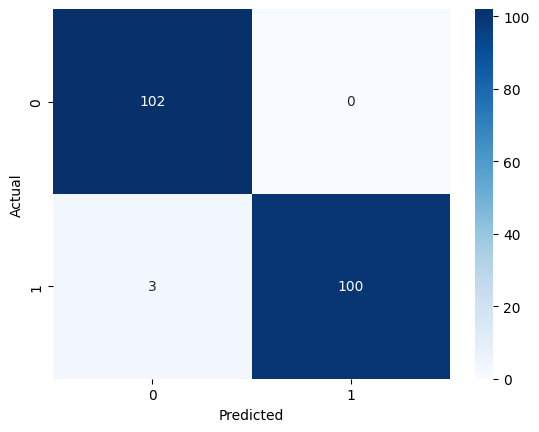

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:

#visualize decision tree
plt.figure(figsize=(20,10), dpi=650)
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()


In [33]:
 """expermimenting with reduced mex depth for reducing overfitting
    (in case of more nosier data this will help model perform better)
    since the data is more balanced the model had less accuaracy on reducing the max_depth
    meanning it didnt read the important features like full decision tree"""
 #reducing max depth   (Control Tree Depth (Overfitting Check))
dt_model_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_limited.fit(X_train, y_train)
y_pred_limited = dt_model_limited.predict(X_test)

print("Decision Tree (Max Depth=4) Accuracy:", accuracy_score(y_test, y_pred_limited))


Decision Tree (Max Depth=4) Accuracy: 0.8


In [34]:
#train a Random Forest and Compare
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


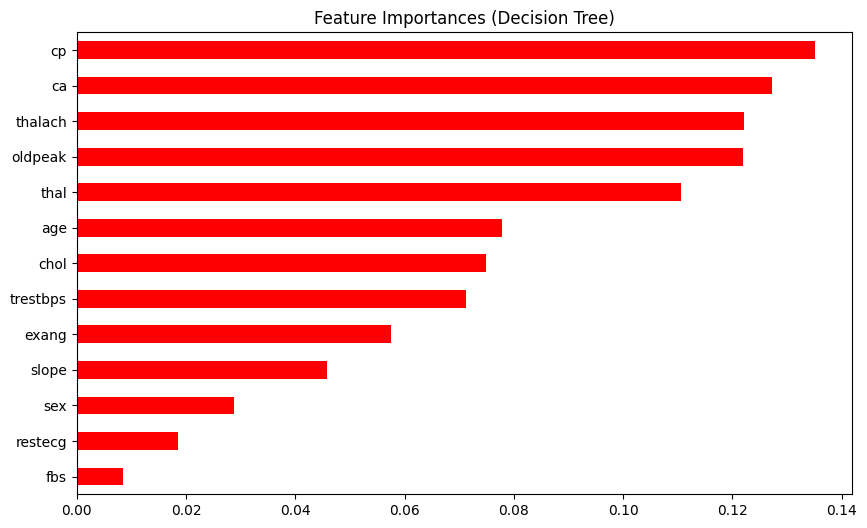

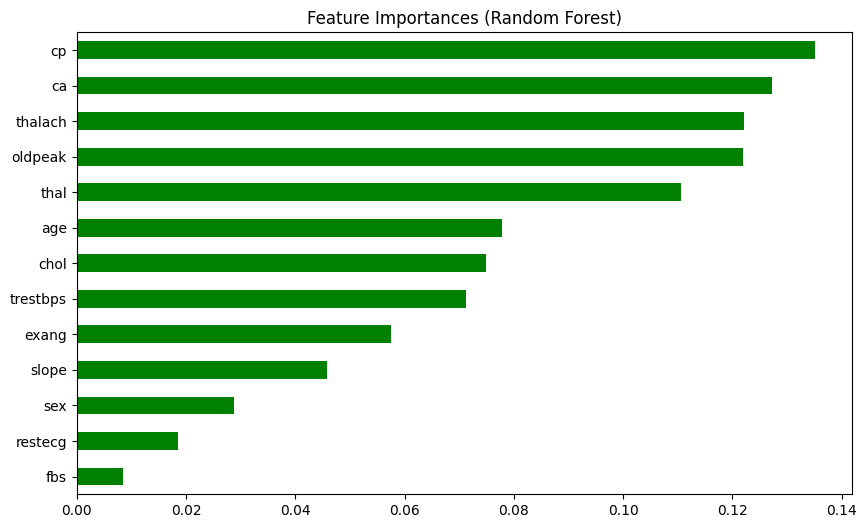

In [42]:
#plotting feature importance

#by decision tree model
importance_scores = dt_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(10,6), color="red")
plt.title("Feature Importances (Decision Tree)")
plt.show()

#by random forest model
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(10,6), color="green")
plt.title("Feature Importances (Random Forest)")
plt.show()




In [43]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073


## Cross-Validation Results and Inference

During the model evaluation phase, the Decision Tree classifier was evaluated using 5-fold cross-validation. The accuracy scores obtained from the folds were as follows:

- Fold Accuracies: `[1.00, 1.00, 1.00, 1.00, 0.985]`
- **Average Cross-Validation Accuracy:** `~0.997`

### Inference

**The Decision Tree model performs exceptionally well on the Heart Disease dataset, demonstrating its capability to generalize across different subsets of data. This strong performance validates the quality and relevance of the selected features and supports the use of decision tree-based methods for heart disease prediction.**